# Fu-Predictor
### Data Analysis

---

by Fujyn

---

### Usage

the goal it to know the accuracy of the dataset and analyze the efficiency for fitting it into a ML model :
- Clean Null value
- Apply Logistic Regresion
- Mesure the accuracy score
- Check the correlation

---

## Package Import

In [60]:
# Import default library
import numpy as np
import pandas as pd

# Import usefull library
from sklearn import svm # for Discriminator
from sklearn.model_selection import train_test_split # for train-test split 
from sklearn.preprocessing import StandardScaler # for feature scaling
from sklearn.model_selection import GridSearchCV # for fine-tuning
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics # for evaluation

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression # For data analizis
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE
from sklearn.impute import SimpleImputer # To replace null value in dataframe

import matplotlib.pyplot as plt  # for visualization 
import seaborn as sns  # for coloring 

---

## Load Working Dataset

In [61]:
# Read game formated csv file
df = pd.read_csv('../data/games_formated.csv')

df = df.sort_values(by='GAME_DATE_EST_x').reset_index(drop=True)

# Sort dataframe by GAME_DATE_EST
df = df.loc[df["GAME_DATE_EST_x"] >= "2007-10-28"].reset_index(drop=True)

# Display first 10 lines of dataset
df.head(100)

,GAME_ID,G_home,W_PCT_home,G_prev_home,W_PCT_prev_home,G_away,W_PCT_away,G_prev_away,W_PCT_prev_away,WIN_PRCT_home_2g,...,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,GAME_DATE_EST_x,SEASON_x,HOME_TEAM_WINS_x,GAME_DATE_EST_y,SEASON_y,HOME_TEAM_WINS_y
0,20700001,82.0,0.707,82.0,0.768,82.0,0.390,82.0,0.256,0.5,...,0.765,0.462,15.0,40.0,2007-10-30,2007,1,2007-10-30,2007,1
1,20700002,82.0,0.512,82.0,0.549,82.0,0.634,82.0,0.415,0.0,...,0.677,0.273,23.0,49.0,2007-10-30,2007,0,2007-10-30,2007,0
2,20700003,82.0,0.512,82.0,0.415,82.0,0.622,82.0,0.500,0.5,...,0.833,0.455,24.0,56.0,2007-10-30,2007,0,2007-10-30,2007,0
3,20700008,82.0,0.610,82.0,0.610,82.0,0.817,82.0,0.732,0.0,...,0.850,0.500,23.0,36.0,2007-10-31,2007,0,2007-10-31,2007,0
4,20700011,82.0,0.549,82.0,0.537,82.0,0.378,82.0,0.427,0.5,...,0.593,0.412,27.0,52.0,2007-10-31,2007,1,2007-10-31,2007,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,20700096,82.0,0.402,82.0,0.317,82.0,0.537,82.0,0.634,0.5,...,0.682,0.143,17.0,38.0,2007-11-13,2007,1,2007-11-13,2007,1
96,20700097,82.0,0.488,82.0,0.439,82.0,0.378,82.0,0.427,0.5,...,0.571,0.200,16.0,44.0,2007-11-13,2007,1,2007-11-13,2007,1
97,20700099,82.0,0.268,82.0,0.598,82.0,0.634,82.0,0.415,0.0,...,0.708,0.211,17.0,36.0,2007-11-13,2007,1,2007-11-13,2007,1
98,20700101,82.0,0.707,82.0,0.768,82.0,0.512,82.0,0.549,1.0,...,0.857,0.125,15.0,50.0,2007-11-13,2007,1,2007-11-13,2007,1


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20539 entries, 0 to 20538
Columns: 111 entries, GAME_ID to HOME_TEAM_WINS_y
dtypes: float64(102), int64(7), object(2)
memory usage: 17.4+ MB


---

## Check if the dataframe contains null values

In [63]:
df.isna().sum().sum()

0

---

## Select features to use in the classifier prediction

In [64]:
# This feature will be used for the prediction of a classifier which takes those fetures as inputs
features = [
    'G_home', 'G_away',
    'W_PCT_home', 'W_PCT_prev_home', 'FG_PCT_home', 'FT_PCT_home', 'FG3_PCT_home', 'AST_home', 'REB_home',
    'W_PCT_away', 'W_PCT_prev_away', 'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away', 'AST_away', 'REB_away',
    'WIN_PRCT_home_2g', 'FG_PCT_home_2g', 'FT_PCT_home_2g', 'FG3_PCT_home_2g', 'AST_home_2g', 'REB_home_2g',
    'WIN_PRCT_away_2g', 'FG_PCT_away_2g', 'FT_PCT_away_2g', 'FG3_PCT_away_2g', 'AST_away_2g', 'REB_away_2g',
    'WIN_PRCT_home_4g', 'FG_PCT_home_4g', 'FT_PCT_home_4g', 'FG3_PCT_home_4g', 'AST_home_4g', 'REB_home_4g',
    'WIN_PRCT_away_4g', 'FG_PCT_away_4g', 'FT_PCT_away_4g', 'FG3_PCT_away_4g', 'AST_away_4g', 'REB_away_4g',
    'WIN_PRCT_home_6g', 'FG_PCT_home_6g', 'FT_PCT_home_6g', 'FG3_PCT_home_6g', 'AST_home_6g', 'REB_home_6g',
    'WIN_PRCT_away_6g', 'FG_PCT_away_6g', 'FT_PCT_away_6g', 'FG3_PCT_away_6g', 'AST_away_6g', 'REB_away_6g',
    'WIN_PRCT_home_8g', 'FG_PCT_home_8g', 'FT_PCT_home_8g', 'FG3_PCT_home_8g', 'AST_home_8g', 'REB_home_8g',
    'WIN_PRCT_away_8g', 'FG_PCT_away_8g', 'FT_PCT_away_8g', 'FG3_PCT_away_8g', 'AST_away_8g', 'REB_away_8g',
    'WIN_PRCT_home_10g', 'FG_PCT_home_10g', 'FT_PCT_home_10g', 'FG3_PCT_home_10g', 'AST_home_10g', 'REB_home_10g',
    'WIN_PRCT_away_10g', 'FG_PCT_away_10g', 'FT_PCT_away_10g', 'FG3_PCT_away_10g', 'AST_away_10g', 'REB_away_10g',
    'WIN_PRCT_home_15g', 'FG_PCT_home_15g', 'FT_PCT_home_15g', 'FG3_PCT_home_15g', 'AST_home_15g', 'REB_home_15g',
    'WIN_PRCT_away_15g', 'FG_PCT_away_15g', 'FT_PCT_away_15g', 'FG3_PCT_away_15g', 'AST_away_15g', 'REB_away_15g'
    ]

# Check selected features in dataframe
X = df[features]
X.head()

,G_home,G_away,W_PCT_home,W_PCT_prev_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,W_PCT_away,...,FT_PCT_home_15g,FG3_PCT_home_15g,AST_home_15g,REB_home_15g,WIN_PRCT_away_15g,FG_PCT_away_15g,FT_PCT_away_15g,FG3_PCT_away_15g,AST_away_15g,REB_away_15g
0,82.0,82.0,0.707,0.768,0.471,0.692,0.250,21.0,40.0,0.390,...,0.716933,0.400533,20.000000,41.266667,0.466667,0.443267,0.779800,0.372867,18.133333,38.000000
1,82.0,82.0,0.512,0.549,0.421,0.600,0.250,18.0,37.0,0.634,...,0.707267,0.356267,20.466667,43.800000,0.466667,0.447200,0.774400,0.368600,20.600000,41.200000
2,82.0,82.0,0.512,0.415,0.416,0.684,0.261,19.0,37.0,0.622,...,0.749400,0.343067,19.133333,39.600000,0.466667,0.448267,0.721467,0.338667,21.600000,43.400000
3,82.0,82.0,0.610,0.610,0.364,0.600,0.250,13.0,47.0,0.817,...,0.727933,0.309867,17.000000,42.600000,0.533333,0.449867,0.800667,0.346667,18.600000,43.066667
4,82.0,82.0,0.549,0.537,0.462,0.714,0.407,31.0,50.0,0.378,...,0.725600,0.326067,21.066667,44.133333,0.133333,0.452733,0.734200,0.330867,19.800000,42.400000


In [65]:
# Check the target
Y = df['HOME_TEAM_WINS_x']
Y.head()

0    1
1    0
2    0
3    0
4    1
Name: HOME_TEAM_WINS_x, dtype: int64

---
## Train Test Split

In [66]:
# Apply Train test split on them
X_train, X_test, Y_train, Y_test = train_test_split(
    X, 
    Y, 
    train_size=0.7, random_state=0, stratify=df['HOME_TEAM_WINS_x'])

print(f"X Train Shape : {X_train.shape} | Y Train Shape : {Y_train.shape} | X Test Shape : {X_test.shape} | Y Test Shape : {Y_test.shape}")

X Train Shape : (14377, 88) | Y Train Shape : (14377,) | X Test Shape : (6162, 88) | Y Test Shape : (6162,)


---
## Cross validation

In [32]:
%%time
models = [RandomForestClassifier(), LogisticRegression(max_iter=5000), SGDClassifier()]
scores = []

for m in models:
    s = cross_val_score(m, X, Y, cv=10, scoring='accuracy')
    scores.append(round(np.mean(s)* 100 ,2))
    
print(scores)

[83.86, 85.31, 69.8]
CPU times: user 12min 47s, sys: 1.5 s, total: 12min 49s
Wall time: 4min 35s


---
## Logistic Regression

In [67]:
%%time
lr = LogisticRegression(max_iter=5000)

# Fit training set to the logistic regression
model = lr.fit(X_train,Y_train)

# Constante
pd.DataFrame(model.coef_[0],index=X_train.columns,columns=["coef"])

CPU times: user 50 s, sys: 944 ms, total: 50.9 s
Wall time: 13.9 s


,coef
G_home,0.000885
G_away,-0.000213
W_PCT_home,1.549886
W_PCT_prev_home,0.707207
FG_PCT_home,16.450645
...,...
FG_PCT_away_15g,0.251144
FT_PCT_away_15g,0.241747
FG3_PCT_away_15g,0.080143
AST_away_15g,0.078505


In [68]:
# Constant
model.intercept_

array([1.0635823])

---

## Hyperparameters Optimisation

#### Grid Search CV

In [21]:
%%time
parametres = [{
    'penalty':['l1','l2', 'elasticnet', 'none'],
    'C':[0.1,1.0,10, 100], 
    'solver' : ['saga', 'liblinear', 'lbfgs', 'sag', 'newton-cg']
}]

gs = GridSearchCV(estimator=model,param_grid=parametres,scoring='accuracy', refit=True, verbose=3)
gs.fit(X,Y)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


/usr/lib64/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ....C=0.1, penalty=l1, solver=saga;, score=0.838 total time= 1.8min


/usr/lib64/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ....C=0.1, penalty=l1, solver=saga;, score=0.835 total time= 1.9min


/usr/lib64/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ....C=0.1, penalty=l1, solver=saga;, score=0.831 total time= 1.9min


/usr/lib64/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END ....C=0.1, penalty=l1, solver=saga;, score=0.839 total time= 1.9min


/usr/lib64/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END ....C=0.1, penalty=l1, solver=saga;, score=0.832 total time= 2.0min
[CV 1/5] END C=0.1, penalty=l1, solver=liblinear;, score=0.862 total time=  13.1s
[CV 2/5] END C=0.1, penalty=l1, solver=liblinear;, score=0.860 total time=   9.6s
[CV 3/5] END C=0.1, penalty=l1, solver=liblinear;, score=0.852 total time=   9.8s
[CV 4/5] END C=0.1, penalty=l1, solver=liblinear;, score=0.853 total time=   8.0s
[CV 5/5] END C=0.1, penalty=l1, solver=liblinear;, score=0.848 total time=   8.8s
[CV 1/5] END .....C=0.1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END .....C=0.1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END .....C=0.1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END .....C=0.1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END .....C=0.1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END .......C=0.1, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END .......C=0

/usr/lib64/python3.10/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/lib64/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/lib64/python3.10/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END ..C=0.1, penalty=none, solver=saga;, score=0.837 total time= 1.6min


/usr/lib64/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/lib64/python3.10/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END ..C=0.1, penalty=none, solver=saga;, score=0.838 total time= 1.6min


/usr/lib64/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/lib64/python3.10/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END ..C=0.1, penalty=none, solver=saga;, score=0.835 total time= 1.5min


/usr/lib64/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/lib64/python3.10/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END ..C=0.1, penalty=none, solver=saga;, score=0.841 total time= 1.6min


/usr/lib64/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/lib64/python3.10/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END ..C=0.1, penalty=none, solver=saga;, score=0.835 total time= 1.6min
[CV 1/5] END C=0.1, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.1, penalty=none, solver=liblinear;, score=nan total time=   0.0s


/usr/lib64/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/lib64/python3.10/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END .C=0.1, penalty=none, solver=lbfgs;, score=0.861 total time=  17.3s


/usr/lib64/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/lib64/python3.10/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END .C=0.1, penalty=none, solver=lbfgs;, score=0.861 total time=  18.6s


/usr/lib64/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/lib64/python3.10/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END .C=0.1, penalty=none, solver=lbfgs;, score=0.852 total time=  17.6s


/usr/lib64/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/lib64/python3.10/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END .C=0.1, penalty=none, solver=lbfgs;, score=0.853 total time=  19.1s


/usr/lib64/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/lib64/python3.10/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END .C=0.1, penalty=none, solver=lbfgs;, score=0.848 total time=  16.1s


/usr/lib64/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/lib64/python3.10/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END ...C=0.1, penalty=none, solver=sag;, score=0.852 total time= 1.1min


/usr/lib64/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/lib64/python3.10/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END ...C=0.1, penalty=none, solver=sag;, score=0.850 total time= 1.1min


/usr/lib64/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/lib64/python3.10/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END ...C=0.1, penalty=none, solver=sag;, score=0.844 total time= 1.1min


/usr/lib64/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/lib64/python3.10/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END ...C=0.1, penalty=none, solver=sag;, score=0.848 total time= 1.2min


/usr/lib64/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/lib64/python3.10/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END ...C=0.1, penalty=none, solver=sag;, score=0.837 total time= 1.2min
[CV 1/5] END C=0.1, penalty=none, solver=newton-cg;, score=0.861 total time=  16.6s


/usr/lib64/python3.10/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/lib64/python3.10/site-packages/scipy/optimize/_linesearch.py:415: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/usr/lib64/python3.10/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/lib64/python3.10/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/usr/lib64/python3.10/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.1, penalty=none, solver=newton-cg;, score=0.861 total time=  13.5s
[CV 3/5] END C=0.1, penalty=none, solver=newton-cg;, score=0.852 total time=  10.4s


/usr/lib64/python3.10/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.1, penalty=none, solver=newton-cg;, score=0.856 total time=  10.4s


/usr/lib64/python3.10/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.1, penalty=none, solver=newton-cg;, score=0.845 total time=  14.3s


/usr/lib64/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ....C=1.0, penalty=l1, solver=saga;, score=0.837 total time= 2.0min


/usr/lib64/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ....C=1.0, penalty=l1, solver=saga;, score=0.838 total time= 2.0min


/usr/lib64/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ....C=1.0, penalty=l1, solver=saga;, score=0.835 total time= 2.0min


/usr/lib64/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END ....C=1.0, penalty=l1, solver=saga;, score=0.842 total time= 2.0min


/usr/lib64/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END ....C=1.0, penalty=l1, solver=saga;, score=0.834 total time= 2.0min
[CV 1/5] END C=1.0, penalty=l1, solver=liblinear;, score=0.862 total time=  19.7s
[CV 2/5] END C=1.0, penalty=l1, solver=liblinear;, score=0.862 total time=  17.8s
[CV 3/5] END C=1.0, penalty=l1, solver=liblinear;, score=0.852 total time=  17.5s
[CV 4/5] END C=1.0, penalty=l1, solver=liblinear;, score=0.853 total time=  14.2s
[CV 5/5] END C=1.0, penalty=l1, solver=liblinear;, score=0.847 total time=  14.3s
[CV 1/5] END .....C=1.0, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END .....C=1.0, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END .....C=1.0, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END .....C=1.0, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END .....C=1.0, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END .......C=1.0, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END .......C=1

/usr/lib64/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ....C=1.0, penalty=l2, solver=saga;, score=0.839 total time= 1.8min


/usr/lib64/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ....C=1.0, penalty=l2, solver=saga;, score=0.838 total time= 1.8min


/usr/lib64/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ....C=1.0, penalty=l2, solver=saga;, score=0.835 total time= 1.7min


/usr/lib64/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END ....C=1.0, penalty=l2, solver=saga;, score=0.840 total time= 1.7min


/usr/lib64/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END ....C=1.0, penalty=l2, solver=saga;, score=0.834 total time= 1.9min
[CV 1/5] END C=1.0, penalty=l2, solver=liblinear;, score=0.861 total time=   3.8s
[CV 2/5] END C=1.0, penalty=l2, solver=liblinear;, score=0.858 total time=   4.8s
[CV 3/5] END C=1.0, penalty=l2, solver=liblinear;, score=0.851 total time=   4.6s
[CV 4/5] END C=1.0, penalty=l2, solver=liblinear;, score=0.854 total time=   4.3s
[CV 5/5] END C=1.0, penalty=l2, solver=liblinear;, score=0.844 total time=   3.9s


/usr/lib64/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END ...C=1.0, penalty=l2, solver=lbfgs;, score=0.861 total time=  17.4s
[CV 2/5] END ...C=1.0, penalty=l2, solver=lbfgs;, score=0.857 total time=  15.8s
[CV 3/5] END ...C=1.0, penalty=l2, solver=lbfgs;, score=0.851 total time=  18.0s
[CV 4/5] END ...C=1.0, penalty=l2, solver=lbfgs;, score=0.852 total time=  17.0s
[CV 5/5] END ...C=1.0, penalty=l2, solver=lbfgs;, score=0.844 total time=  15.3s


/usr/lib64/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END .....C=1.0, penalty=l2, solver=sag;, score=0.850 total time= 1.1min


/usr/lib64/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END .....C=1.0, penalty=l2, solver=sag;, score=0.847 total time= 1.1min


/usr/lib64/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END .....C=1.0, penalty=l2, solver=sag;, score=0.844 total time= 1.1min


/usr/lib64/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END .....C=1.0, penalty=l2, solver=sag;, score=0.847 total time= 1.1min


/usr/lib64/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END .....C=1.0, penalty=l2, solver=sag;, score=0.837 total time= 1.1min
[CV 1/5] END C=1.0, penalty=l2, solver=newton-cg;, score=0.861 total time=   3.8s
[CV 2/5] END C=1.0, penalty=l2, solver=newton-cg;, score=0.859 total time=   4.1s
[CV 3/5] END C=1.0, penalty=l2, solver=newton-cg;, score=0.850 total time=   4.2s
[CV 4/5] END C=1.0, penalty=l2, solver=newton-cg;, score=0.852 total time=   4.4s
[CV 5/5] END C=1.0, penalty=l2, solver=newton-cg;, score=0.845 total time=   4.6s
[CV 1/5] END C=1.0, penalty=elasticnet, solver=saga;, score=nan total time=   0.0s
[CV 2/5] END C=1.0, penalty=elasticnet, solver=saga;, score=nan total time=   0.0s
[CV 3/5] END C=1.0, penalty=elasticnet, solver=saga;, score=nan total time=   0.0s
[CV 4/5] END C=1.0, penalty=elasticnet, solver=saga;, score=nan total time=   0.0s
[CV 5/5] END C=1.0, penalty=elasticnet, solver=saga;, score=nan total time=   0.0s
[CV 1/5] END C=1.0, penalty=elasticnet, solver=liblinear;, score=nan total time=   0.0s
[CV 2/

/usr/lib64/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ..C=1.0, penalty=none, solver=saga;, score=0.837 total time= 1.6min


/usr/lib64/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ..C=1.0, penalty=none, solver=saga;, score=0.838 total time= 1.6min


/usr/lib64/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ..C=1.0, penalty=none, solver=saga;, score=0.835 total time= 1.6min


/usr/lib64/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END ..C=1.0, penalty=none, solver=saga;, score=0.841 total time= 1.6min


/usr/lib64/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END ..C=1.0, penalty=none, solver=saga;, score=0.835 total time= 1.6min
[CV 1/5] END C=1.0, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=1.0, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=1.0, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=1.0, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=1.0, penalty=none, solver=liblinear;, score=nan total time=   0.0s


/usr/lib64/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END .C=1.0, penalty=none, solver=lbfgs;, score=0.861 total time=  17.1s


/usr/lib64/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END .C=1.0, penalty=none, solver=lbfgs;, score=0.861 total time=  20.9s


/usr/lib64/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END .C=1.0, penalty=none, solver=lbfgs;, score=0.852 total time=  18.5s


/usr/lib64/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END .C=1.0, penalty=none, solver=lbfgs;, score=0.853 total time=  16.3s


/usr/lib64/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END .C=1.0, penalty=none, solver=lbfgs;, score=0.848 total time=  15.6s


/usr/lib64/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ...C=1.0, penalty=none, solver=sag;, score=0.852 total time= 1.1min


/usr/lib64/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ...C=1.0, penalty=none, solver=sag;, score=0.850 total time= 1.1min


/usr/lib64/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ...C=1.0, penalty=none, solver=sag;, score=0.844 total time= 1.2min


/usr/lib64/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END ...C=1.0, penalty=none, solver=sag;, score=0.848 total time= 1.1min


/usr/lib64/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END ...C=1.0, penalty=none, solver=sag;, score=0.837 total time= 1.1min
[CV 1/5] END C=1.0, penalty=none, solver=newton-cg;, score=0.861 total time=  16.2s


/usr/lib64/python3.10/site-packages/scipy/optimize/_linesearch.py:415: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/usr/lib64/python3.10/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/lib64/python3.10/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 2/5] END C=1.0, penalty=none, solver=newton-cg;, score=0.861 total time=  16.7s
[CV 3/5] END C=1.0, penalty=none, solver=newton-cg;, score=0.852 total time=  12.0s
[CV 4/5] END C=1.0, penalty=none, solver=newton-cg;, score=0.856 total time=  11.6s
[CV 5/5] END C=1.0, penalty=none, solver=newton-cg;, score=0.845 total time=  13.7s


/usr/lib64/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END .....C=10, penalty=l1, solver=saga;, score=0.837 total time= 2.2min


/usr/lib64/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END .....C=10, penalty=l1, solver=saga;, score=0.838 total time= 2.7min


/usr/lib64/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END .....C=10, penalty=l1, solver=saga;, score=0.835 total time= 2.3min


/usr/lib64/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END .....C=10, penalty=l1, solver=saga;, score=0.841 total time= 2.1min


/usr/lib64/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END .....C=10, penalty=l1, solver=saga;, score=0.835 total time= 2.1min
[CV 1/5] END C=10, penalty=l1, solver=liblinear;, score=0.862 total time=  27.9s
[CV 2/5] END C=10, penalty=l1, solver=liblinear;, score=0.859 total time=  28.8s
[CV 3/5] END C=10, penalty=l1, solver=liblinear;, score=0.852 total time=  27.4s
[CV 4/5] END C=10, penalty=l1, solver=liblinear;, score=0.855 total time=  21.4s
[CV 5/5] END C=10, penalty=l1, solver=liblinear;, score=0.847 total time=  21.4s
[CV 1/5] END ......C=10, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END ......C=10, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END ......C=10, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END ......C=10, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END ......C=10, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END ........C=10, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END ........C=10, p

/usr/lib64/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END .....C=10, penalty=l2, solver=saga;, score=0.837 total time= 1.7min


/usr/lib64/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END .....C=10, penalty=l2, solver=saga;, score=0.838 total time= 1.8min


/usr/lib64/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END .....C=10, penalty=l2, solver=saga;, score=0.835 total time= 1.8min


/usr/lib64/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END .....C=10, penalty=l2, solver=saga;, score=0.841 total time= 1.8min


/usr/lib64/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END .....C=10, penalty=l2, solver=saga;, score=0.835 total time= 1.9min
[CV 1/5] END C=10, penalty=l2, solver=liblinear;, score=0.863 total time=   4.3s
[CV 2/5] END C=10, penalty=l2, solver=liblinear;, score=0.861 total time=   3.9s
[CV 3/5] END C=10, penalty=l2, solver=liblinear;, score=0.851 total time=   4.5s
[CV 4/5] END C=10, penalty=l2, solver=liblinear;, score=0.854 total time=   4.4s
[CV 5/5] END C=10, penalty=l2, solver=liblinear;, score=0.849 total time=   4.1s


/usr/lib64/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END ....C=10, penalty=l2, solver=lbfgs;, score=0.864 total time=  16.0s


/usr/lib64/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END ....C=10, penalty=l2, solver=lbfgs;, score=0.861 total time=  17.8s


/usr/lib64/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END ....C=10, penalty=l2, solver=lbfgs;, score=0.852 total time=  17.0s


/usr/lib64/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END ....C=10, penalty=l2, solver=lbfgs;, score=0.854 total time=  17.1s


/usr/lib64/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END ....C=10, penalty=l2, solver=lbfgs;, score=0.849 total time=  16.6s


/usr/lib64/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ......C=10, penalty=l2, solver=sag;, score=0.852 total time= 1.1min


/usr/lib64/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ......C=10, penalty=l2, solver=sag;, score=0.850 total time= 1.1min


/usr/lib64/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ......C=10, penalty=l2, solver=sag;, score=0.844 total time= 1.1min


/usr/lib64/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END ......C=10, penalty=l2, solver=sag;, score=0.848 total time= 1.1min


/usr/lib64/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END ......C=10, penalty=l2, solver=sag;, score=0.838 total time= 1.1min
[CV 1/5] END C=10, penalty=l2, solver=newton-cg;, score=0.864 total time=   5.7s
[CV 2/5] END C=10, penalty=l2, solver=newton-cg;, score=0.861 total time=   6.8s
[CV 3/5] END C=10, penalty=l2, solver=newton-cg;, score=0.852 total time=   6.8s
[CV 4/5] END C=10, penalty=l2, solver=newton-cg;, score=0.854 total time=   5.7s
[CV 5/5] END C=10, penalty=l2, solver=newton-cg;, score=0.847 total time=   6.8s
[CV 1/5] END C=10, penalty=elasticnet, solver=saga;, score=nan total time=   0.0s
[CV 2/5] END C=10, penalty=elasticnet, solver=saga;, score=nan total time=   0.0s
[CV 3/5] END C=10, penalty=elasticnet, solver=saga;, score=nan total time=   0.0s
[CV 4/5] END C=10, penalty=elasticnet, solver=saga;, score=nan total time=   0.0s
[CV 5/5] END C=10, penalty=elasticnet, solver=saga;, score=nan total time=   0.0s
[CV 1/5] END C=10, penalty=elasticnet, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=10

/usr/lib64/python3.10/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/lib64/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/lib64/python3.10/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END ...C=10, penalty=none, solver=saga;, score=0.837 total time= 1.5min


/usr/lib64/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/lib64/python3.10/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END ...C=10, penalty=none, solver=saga;, score=0.838 total time= 1.5min


/usr/lib64/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/lib64/python3.10/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END ...C=10, penalty=none, solver=saga;, score=0.835 total time= 1.5min


/usr/lib64/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/lib64/python3.10/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END ...C=10, penalty=none, solver=saga;, score=0.841 total time= 1.5min


/usr/lib64/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/lib64/python3.10/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END ...C=10, penalty=none, solver=saga;, score=0.835 total time= 1.5min
[CV 1/5] END C=10, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=10, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=10, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=10, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=10, penalty=none, solver=liblinear;, score=nan total time=   0.0s


/usr/lib64/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/lib64/python3.10/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END ..C=10, penalty=none, solver=lbfgs;, score=0.861 total time=  16.5s


/usr/lib64/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/lib64/python3.10/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END ..C=10, penalty=none, solver=lbfgs;, score=0.861 total time=  16.5s


/usr/lib64/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/lib64/python3.10/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END ..C=10, penalty=none, solver=lbfgs;, score=0.852 total time=  16.3s


/usr/lib64/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/lib64/python3.10/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END ..C=10, penalty=none, solver=lbfgs;, score=0.853 total time=  15.9s


/usr/lib64/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/lib64/python3.10/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END ..C=10, penalty=none, solver=lbfgs;, score=0.848 total time=  16.0s


/usr/lib64/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/lib64/python3.10/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END ....C=10, penalty=none, solver=sag;, score=0.852 total time= 1.1min


/usr/lib64/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/lib64/python3.10/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END ....C=10, penalty=none, solver=sag;, score=0.850 total time= 1.1min


/usr/lib64/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/lib64/python3.10/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END ....C=10, penalty=none, solver=sag;, score=0.844 total time= 1.1min


/usr/lib64/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/lib64/python3.10/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END ....C=10, penalty=none, solver=sag;, score=0.848 total time= 1.1min


/usr/lib64/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/lib64/python3.10/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END ....C=10, penalty=none, solver=sag;, score=0.837 total time= 1.1min
[CV 1/5] END C=10, penalty=none, solver=newton-cg;, score=0.861 total time=  13.4s


/usr/lib64/python3.10/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/lib64/python3.10/site-packages/scipy/optimize/_linesearch.py:415: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/usr/lib64/python3.10/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/lib64/python3.10/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/usr/lib64/python3.10/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=10, penalty=none, solver=newton-cg;, score=0.861 total time=  13.0s
[CV 3/5] END C=10, penalty=none, solver=newton-cg;, score=0.852 total time=  10.6s


/usr/lib64/python3.10/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=10, penalty=none, solver=newton-cg;, score=0.856 total time=  10.6s


/usr/lib64/python3.10/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=10, penalty=none, solver=newton-cg;, score=0.845 total time=  12.5s


/usr/lib64/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ....C=100, penalty=l1, solver=saga;, score=0.837 total time= 2.0min


/usr/lib64/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ....C=100, penalty=l1, solver=saga;, score=0.838 total time= 2.0min


/usr/lib64/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ....C=100, penalty=l1, solver=saga;, score=0.835 total time= 1.9min


/usr/lib64/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END ....C=100, penalty=l1, solver=saga;, score=0.841 total time= 1.9min


/usr/lib64/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END ....C=100, penalty=l1, solver=saga;, score=0.835 total time= 2.0min
[CV 1/5] END C=100, penalty=l1, solver=liblinear;, score=0.861 total time=  25.2s
[CV 2/5] END C=100, penalty=l1, solver=liblinear;, score=0.861 total time=  35.6s
[CV 3/5] END C=100, penalty=l1, solver=liblinear;, score=0.852 total time=  31.0s
[CV 4/5] END C=100, penalty=l1, solver=liblinear;, score=0.855 total time=  21.1s
[CV 5/5] END C=100, penalty=l1, solver=liblinear;, score=0.846 total time=  23.3s
[CV 1/5] END .....C=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END .....C=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END .....C=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END .....C=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END .....C=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END .......C=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END .......C=1

/usr/lib64/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ....C=100, penalty=l2, solver=saga;, score=0.837 total time= 1.8min


/usr/lib64/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ....C=100, penalty=l2, solver=saga;, score=0.838 total time= 1.7min


/usr/lib64/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ....C=100, penalty=l2, solver=saga;, score=0.835 total time= 1.7min


/usr/lib64/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END ....C=100, penalty=l2, solver=saga;, score=0.841 total time= 1.7min


/usr/lib64/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END ....C=100, penalty=l2, solver=saga;, score=0.835 total time= 1.7min
[CV 1/5] END C=100, penalty=l2, solver=liblinear;, score=0.863 total time=   4.3s
[CV 2/5] END C=100, penalty=l2, solver=liblinear;, score=0.861 total time=   4.7s
[CV 3/5] END C=100, penalty=l2, solver=liblinear;, score=0.852 total time=   4.4s
[CV 4/5] END C=100, penalty=l2, solver=liblinear;, score=0.854 total time=   4.3s
[CV 5/5] END C=100, penalty=l2, solver=liblinear;, score=0.847 total time=   4.4s


/usr/lib64/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END ...C=100, penalty=l2, solver=lbfgs;, score=0.864 total time=  16.6s


/usr/lib64/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END ...C=100, penalty=l2, solver=lbfgs;, score=0.861 total time=  16.8s


/usr/lib64/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END ...C=100, penalty=l2, solver=lbfgs;, score=0.852 total time=  16.5s


/usr/lib64/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END ...C=100, penalty=l2, solver=lbfgs;, score=0.853 total time=  16.5s


/usr/lib64/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END ...C=100, penalty=l2, solver=lbfgs;, score=0.848 total time=  17.5s


/usr/lib64/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END .....C=100, penalty=l2, solver=sag;, score=0.852 total time= 1.1min


/usr/lib64/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END .....C=100, penalty=l2, solver=sag;, score=0.850 total time= 1.0min


/usr/lib64/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END .....C=100, penalty=l2, solver=sag;, score=0.844 total time= 1.1min


/usr/lib64/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END .....C=100, penalty=l2, solver=sag;, score=0.848 total time= 1.1min


/usr/lib64/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END .....C=100, penalty=l2, solver=sag;, score=0.837 total time= 1.1min
[CV 1/5] END C=100, penalty=l2, solver=newton-cg;, score=0.862 total time=  10.4s
[CV 2/5] END C=100, penalty=l2, solver=newton-cg;, score=0.860 total time=  11.1s
[CV 3/5] END C=100, penalty=l2, solver=newton-cg;, score=0.852 total time=   9.2s
[CV 4/5] END C=100, penalty=l2, solver=newton-cg;, score=0.855 total time=  11.2s
[CV 5/5] END C=100, penalty=l2, solver=newton-cg;, score=0.846 total time=  10.8s
[CV 1/5] END C=100, penalty=elasticnet, solver=saga;, score=nan total time=   0.0s
[CV 2/5] END C=100, penalty=elasticnet, solver=saga;, score=nan total time=   0.0s
[CV 3/5] END C=100, penalty=elasticnet, solver=saga;, score=nan total time=   0.0s
[CV 4/5] END C=100, penalty=elasticnet, solver=saga;, score=nan total time=   0.0s
[CV 5/5] END C=100, penalty=elasticnet, solver=saga;, score=nan total time=   0.0s
[CV 1/5] END C=100, penalty=elasticnet, solver=liblinear;, score=nan total time=   0.0s
[CV 2/

/usr/lib64/python3.10/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/lib64/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/lib64/python3.10/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END ..C=100, penalty=none, solver=saga;, score=0.837 total time= 1.5min


/usr/lib64/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/lib64/python3.10/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END ..C=100, penalty=none, solver=saga;, score=0.838 total time= 1.5min


/usr/lib64/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/lib64/python3.10/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END ..C=100, penalty=none, solver=saga;, score=0.835 total time= 1.5min


/usr/lib64/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/lib64/python3.10/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END ..C=100, penalty=none, solver=saga;, score=0.841 total time= 1.5min


/usr/lib64/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/lib64/python3.10/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END ..C=100, penalty=none, solver=saga;, score=0.835 total time= 1.5min
[CV 1/5] END C=100, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=100, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=100, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=100, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=100, penalty=none, solver=liblinear;, score=nan total time=   0.0s


/usr/lib64/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/lib64/python3.10/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END .C=100, penalty=none, solver=lbfgs;, score=0.861 total time=  15.9s


/usr/lib64/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/lib64/python3.10/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END .C=100, penalty=none, solver=lbfgs;, score=0.861 total time=  15.2s


/usr/lib64/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/lib64/python3.10/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END .C=100, penalty=none, solver=lbfgs;, score=0.852 total time=  15.4s


/usr/lib64/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/lib64/python3.10/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END .C=100, penalty=none, solver=lbfgs;, score=0.853 total time=  16.0s


/usr/lib64/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/lib64/python3.10/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END .C=100, penalty=none, solver=lbfgs;, score=0.848 total time=  14.9s


/usr/lib64/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/lib64/python3.10/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END ...C=100, penalty=none, solver=sag;, score=0.852 total time= 1.1min


/usr/lib64/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/lib64/python3.10/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END ...C=100, penalty=none, solver=sag;, score=0.850 total time= 1.1min


/usr/lib64/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/lib64/python3.10/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END ...C=100, penalty=none, solver=sag;, score=0.844 total time= 1.1min


/usr/lib64/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/lib64/python3.10/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END ...C=100, penalty=none, solver=sag;, score=0.848 total time= 1.1min


/usr/lib64/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/lib64/python3.10/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END ...C=100, penalty=none, solver=sag;, score=0.837 total time= 1.1min
[CV 1/5] END C=100, penalty=none, solver=newton-cg;, score=0.861 total time=  14.0s


/usr/lib64/python3.10/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/lib64/python3.10/site-packages/scipy/optimize/_linesearch.py:415: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/usr/lib64/python3.10/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/lib64/python3.10/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/usr/lib64/python3.10/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=100, penalty=none, solver=newton-cg;, score=0.861 total time=  13.7s
[CV 3/5] END C=100, penalty=none, solver=newton-cg;, score=0.852 total time=  12.3s


/usr/lib64/python3.10/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=100, penalty=none, solver=newton-cg;, score=0.856 total time=  10.6s


/usr/lib64/python3.10/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=100, penalty=none, solver=newton-cg;, score=0.845 total time=  11.6s


/usr/lib64/python3.10/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
180 fits failed out of a total of 400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/lib64/python3.10/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/lib64/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/lib64/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueError: Solver lbfgs suppo

CPU times: user 3h 38min 29s, sys: 11.1 s, total: 3h 38min 40s
Wall time: 2h 53min 19s


/usr/lib64/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(estimator=LogisticRegression(max_iter=4000),
             param_grid=[{'C': [0.1, 1.0, 10, 100],
                          'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                          'solver': ['saga', 'liblinear', 'lbfgs', 'sag',
                                     'newton-cg']}],
             scoring='accuracy', verbose=3)

In [22]:
print(pd.DataFrame(gs.cv_results_).loc[:,['params','mean_test_score']])

                                               params  mean_test_score
0       {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}         0.835045
1   {'C': 0.1, 'penalty': 'l1', 'solver': 'libline...         0.855056
2      {'C': 0.1, 'penalty': 'l1', 'solver': 'lbfgs'}              NaN
3        {'C': 0.1, 'penalty': 'l1', 'solver': 'sag'}              NaN
4   {'C': 0.1, 'penalty': 'l1', 'solver': 'newton-...              NaN
..                                                ...              ...
75    {'C': 100, 'penalty': 'none', 'solver': 'saga'}         0.837529
76  {'C': 100, 'penalty': 'none', 'solver': 'libli...              NaN
77   {'C': 100, 'penalty': 'none', 'solver': 'lbfgs'}         0.855007
78     {'C': 100, 'penalty': 'none', 'solver': 'sag'}         0.846195
79  {'C': 100, 'penalty': 'none', 'solver': 'newto...         0.854861

[80 rows x 2 columns]


---

#### Best estimator

In [23]:
print(gs.best_params_)

{'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}


---
#### Best score

In [24]:
print(gs.best_score_)

0.8561756959464792


---
#### Prediction with the best estimator

In [25]:
# pred_best = gs.predict(X_test)
pred_best = gs.best_estimator_.predict(X_test)

# Performance mesures
print(metrics.classification_report(Y_test,pred_best))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83      2558
           1       0.88      0.89      0.88      3604

    accuracy                           0.86      6162
   macro avg       0.86      0.86      0.86      6162
weighted avg       0.86      0.86      0.86      6162



#### Confusion matrix

In [26]:
cm = metrics.confusion_matrix(Y_test,pred_best)
print(cm)

[[2101  457]
 [ 401 3203]]


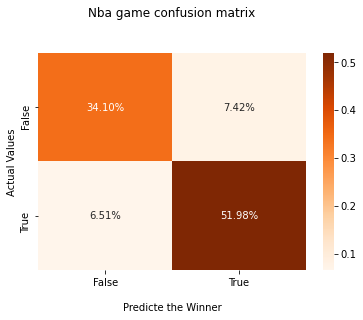

In [27]:
ax = sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Oranges')

ax.set_title('Nba game confusion matrix\n\n');
ax.set_xlabel('\nPredicte the Winner')
ax.set_ylabel('Actual Values');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

#### Accuracy score

In [28]:
acc = metrics.accuracy_score(Y_test, pred_best)
print("The accuracy score is up to : ",round(acc * 100 ,2),"%")

The accuracy score is up to :  86.08 %


---
## Optimized Logistic regression

In [1]:
%%time
olr = LogisticRegression(max_iter = 7000, C = 10, penalty = 'l2', solver = 'lbfgs')

# Fit training set to the logistic regression
omodel = olr.fit(X_train,Y_train)

# Constante
pd.DataFrame(omodel.coef_[0],index=X_train.columns,columns=["coef"])

NameError: name 'LogisticRegression' is not defined

In [70]:
omodel.intercept_

array([2.44844878])

---
### Build Optimized Y pred

In [71]:
OY_pred = omodel.predict(X_test)

---
### Display Optimized confusion matrix

In [72]:
cm2 = metrics.confusion_matrix(Y_test,OY_pred)
print(cm2)

[[2092  466]
 [ 412 3192]]


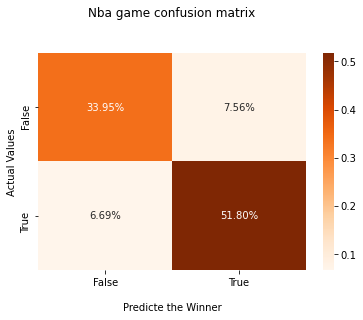

In [73]:
ax = sns.heatmap(cm2/np.sum(cm2), annot=True, 
            fmt='.2%', cmap='Oranges')

ax.set_title('Nba game confusion matrix\n\n');
ax.set_xlabel('\nPredicte the Winner')
ax.set_ylabel('Actual Values');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

### Display Optimized Confusion report

In [74]:
cr = metrics.classification_report(Y_test,OY_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.84      0.82      0.83      2558
           1       0.87      0.89      0.88      3604

    accuracy                           0.86      6162
   macro avg       0.85      0.85      0.85      6162
weighted avg       0.86      0.86      0.86      6162



---
### Display Optimized accuracy score

In [75]:
acc = metrics.accuracy_score(Y_test,OY_pred)
print("The accuracy score is up to : ",round(acc * 100 ,2),"%")

The accuracy score is up to :  85.75 %


---
### Apply Standard scaler on training set 

In [48]:
std = StandardScaler()
Z = std.fit_transform(X_train)

---
### Standardized & Optimized logistic regression

In [49]:
%%time
regStd = LogisticRegression(max_iter = 7000, C = 10, penalty = 'l2', solver = 'lbfgs')
regStd.fit(Z,Y_train)


CPU times: user 1.27 s, sys: 5.84 ms, total: 1.28 s
Wall time: 360 ms


LogisticRegression(C=10, max_iter=7000)

In [50]:
%%time
SX_test = std.fit_transform(X_test)

RSY_pred = regStd.predict(SX_test)

print('balanced accuracy score:', round(metrics.balanced_accuracy_score(Y_test, RSY_pred) * 100, 4), ' %')

balanced accuracy score: 85.311  %
CPU times: user 26.6 ms, sys: 0 ns, total: 26.6 ms
Wall time: 19.9 ms


---
# -------------------- Test -------------------- 
---

---
### Stochastic gradient descent

In [59]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss='log', penalty="l2")
sgd.fit(Z,Y_train)

#coef.
print(pd.DataFrame(sgd.coef_[0],index=X_train.columns,columns=["coef"]))

                      coef
G_home            0.020678
G_away           -0.009924
W_PCT_home        0.291163
W_PCT_prev_home   0.040204
FG_PCT_home       1.659707
...                    ...
FG_PCT_away_15g   0.141876
FT_PCT_away_15g  -0.084391
FG3_PCT_away_15g  0.070527
AST_away_15g      0.065854
REB_away_15g      0.094297

[88 rows x 1 columns]


---
### Divide the coefficients by the standard deviations to de-standardize
#### Little bit different than the logistic regression

In [56]:
#diviser les coefs. par les écarts-type pour dé-standardiser
#un peu différents de "reg"
#parce qu'algo différent de LogisticRegression ('lbfgs' par défaut)
res = sgd.coef_[0] / std.scale_
print(pd.DataFrame(res,index=X_train.columns,columns=["coef"]))

                       coef
G_home            -0.000069
G_away            -0.002972
W_PCT_home         1.842762
W_PCT_prev_home    1.415552
FG_PCT_home       27.873165
...                     ...
FG_PCT_away_15g    3.970639
FT_PCT_away_15g   -1.615869
FG3_PCT_away_15g   2.234937
AST_away_15g       0.070231
REB_away_15g       0.053847

[88 rows x 1 columns]


In [57]:
beta_sorted = beta.sort_values(by='beta',ascending=False)
print(beta_sorted)

AttributeError: 'numpy.ndarray' object has no attribute 'sort_values'

In [54]:
import seaborn as sns
sns.barplot(x='beta',y=beta_sorted.index,data=beta_sorted,color='skyblue')

NameError: name 'beta_sorted' is not defined

In [55]:
beta_sorted.index

NameError: name 'beta_sorted' is not defined

---
## SVM model

In [53]:
%%time

clf = svm.SVC(kernel='linear',C=10.0, gamma=1.0)
clf.fit(X_train, Y_train)

SVY_pred = clf.predict(X_test)
print(f"Balanced accuracy score : {round(metrics.balanced_accuracy_score(Y_test, SVY_pred) * 100, 2)} %")

Balanced accuracy score : 85.21 %
CPU times: user 9min 28s, sys: 126 ms, total: 9min 28s
Wall time: 9min 30s


In [54]:
%%time


SVY_pred = clf.predict(X_test)
print(f"Balanced accuracy score : {round(metrics.balanced_accuracy_score(Y_test, SVY_pred) * 100, 2)} %")

Balanced accuracy score : 85.21 %
CPU times: user 1.9 s, sys: 998 µs, total: 1.9 s
Wall time: 1.92 s


---
## Random forest

In [55]:
%%time
rf = RandomForestClassifier(random_state=44, n_jobs=1, bootstrap=True, 
                            criterion='entropy', n_estimators=700, max_depth=10, 
                            max_features='auto', min_samples_leaf=4, min_samples_split=10)
rf.fit(X_train, Y_train)

CPU times: user 40.2 s, sys: 4.94 ms, total: 40.2 s
Wall time: 40.4 s


RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=4,
                       min_samples_split=10, n_estimators=700, n_jobs=1,
                       random_state=44)

In [56]:
%%time
RFY_pred = rf.predict(X_test)

print(f"Balanced accuracy score : {metrics.balanced_accuracy_score(Y_test, RFY_pred) * 100, 2} %")

Balanced accuracy score : (82.92961777331938, 2) %
CPU times: user 748 ms, sys: 998 µs, total: 749 ms
Wall time: 758 ms


---
### GridSearch on Random Forest

In [39]:
%%time

param_grid = { 
    'max_depth': [4,6,8,10],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_leaf': [2,4,6,8,10],
    'min_samples_split': [2,4,6,8,10]
}

CV_rfc = GridSearchCV(estimator=rf,param_grid=param_grid, cv=5, scoring='accuracy')
CV_rfc.fit(X_train, Y_train)
print("tuned hyperparameters :(best parameters) ",CV_rfc.best_params_)
print("accuracy :",round(CV_rfc.best_score_*100 ,2))

tuned hyperparameters :(best parameters)  {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 10}
accuracy : 84.24
CPU times: user 7h 5min 41s, sys: 5.72 s, total: 7h 5min 47s
Wall time: 7h 7min 20s


---
### RandomizedSearch on Random Forest

In [60]:
%%time
param_random= {
#     'max_depth': [4,6,8,10],
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'min_samples_leaf': [2,4,6,8,10],
#     'min_samples_split': [2,4,6,8,10],
    'max_samples' : list(range(1,10)),
}

CV_rfc = RandomizedSearchCV(rf, param_random, n_iter=1, random_state=44, n_jobs=1, cv=5)
CV_rfc.fit(X_train, Y_train)
print("tuned hyperparameters :(best parameters) ",CV_rfc.best_params_)
print("accuracy :",round(CV_rfc.best_score_*100 ,2))

tuned hyperparameters :(best parameters)  {'max_samples': 7}
accuracy : 58.29
CPU times: user 7.5 s, sys: 12.8 ms, total: 7.52 s
Wall time: 7.56 s
